# importing libaries

In [1]:
# Importing important packages
import os
import sys

# Data Wrangling and manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

from sklearn.model_selection import train_test_split

# Importing from the NLP tools
import spacy # for lemmatization
nlp = spacy.load('en_core_web_sm')

import re   # regex
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt') # for word_tokenize
nltk.download('stopwords') # for stopwords


[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Loading the data
data = pd.read_csv('Resume.csv')

# drop unused column
data.drop(columns=['ID', 'Resume_html'], inplace=True)

# renaming columns to make easier access
data.rename(columns={'Resume_str':'resume', 'Category':'role'}, inplace=True)

# Checking out a sample format of the loaded data
data.head(3)

,resume,role
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR


In [3]:
data['resume'] = data['resume'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   resume  2484 non-null   object
 1   role    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


# Data preprocessing

In [4]:
# removing this entry because resume is a empty string
data.drop(656, inplace=True)

In [5]:
# checking duplicated
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [6]:
data.shape

(2481, 2)

In [7]:
data.sample(5)

,resume,role
726,IMPACT Highlights ...,HEALTHCARE
1664,PRODUCT MARKETING MANAGER Profe...,APPAREL
1929,CONCRETE CONSTRUCTION Summary...,CONSTRUCTION
1289,MEDIA ACTIVITIES SPECIALIST Sum...,DIGITAL-MEDIA
2309,4/5 GRADE TEACHER Summary ...,ARTS


function for cleaning text,
- change text to lower case
- remove email, URLs, html tags, non-english characters
- remove extra space
- lemmatizing or converting words into their base forms eg. apples -> apple, flying -> fly
- remove stopwords eg. I, you, am, etc.

In [8]:
def clean(text):
    text = text.lower()

    text = re.sub('^[\w\-\.]+@([\w-]+\.)+[\w-]{2,4}', ' ', text)  # remove email
    text = re.sub('[(http(s)?):\/\/(www\.)?a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#\?&//=]*)', ' ', text)  # remove URLs
    text = re.sub('<.+?>', ' ', text)  # html tags
    text = re.sub('[^a-z]', ' ', text) # remove non-characters
    text = re.sub('\s+', ' ', text)  # remove extra whitespace

    doc = nlp(text) # change text into DOC object
    text = ' '.join([token.lemma_ for token in doc]) # lemmatization
     
    text = text.lower() # we need to change 
     
    text = word_tokenize(text) # tokenize word in list
    
    stop_words = set(stopwords.words('english')) # get stopwords
    text = [word for word in text if word not in stop_words] # remove stop words
    
    return ' '.join(text)

In [9]:
clean("I am sly king of the fly.")

'sly king fly'

In [10]:
data['resume'] = data['resume'].apply(lambda x : clean(x))

In [11]:
data.sample(10)

,resume,role
374,teacher summary elementary school teacher many...,TEACHER
2362,audio visual technician summary proficient con...,ARTS
1304,digital marketing specialist highlight strong ...,DIGITAL-MEDIA
1777,chemical engineering intern objective statemen...,ENGINEERING
154,instructional designer summary dedicate effici...,DESIGNER
2026,project engineer project manager summary const...,CONSTRUCTION
1989,safety professional construction supervisor su...,CONSTRUCTION
1936,construction coordinator summary dedicate resu...,CONSTRUCTION
2474,production excellence specialist summary resul...,AVIATION
552,organizer capacity building strategist experie...,ADVOCATE


# Label Encoding

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# label encoding -> role
data['role_id'] = le.fit_transform(data['role'])

# printing labels
for i,v in enumerate(le.classes_):
    print(f'{i} : {v}')

0 : ACCOUNTANT
1 : ADVOCATE
2 : AGRICULTURE
3 : APPAREL
4 : ARTS
5 : AUTOMOBILE
6 : AVIATION
7 : BANKING
8 : BPO
9 : BUSINESS-DEVELOPMENT
10 : CHEF
11 : CONSTRUCTION
12 : CONSULTANT
13 : DESIGNER
14 : DIGITAL-MEDIA
15 : ENGINEERING
16 : FINANCE
17 : FITNESS
18 : HEALTHCARE
19 : HR
20 : INFORMATION-TECHNOLOGY
21 : PUBLIC-RELATIONS
22 : SALES
23 : TEACHER


In [13]:
data.head()

,resume,role,role_id
0,hr administrator marketing associate hr admini...,HR,19
1,hr specialist us hr operation summary versatil...,HR,19
2,hr director summary year experience recruiting...,HR,19
3,hr specialist summary dedicate drive dynamic y...,HR,19
4,hr manager skill highlight hr skill hr departm...,HR,19


# Exploratory Data Analysis : check word frequency

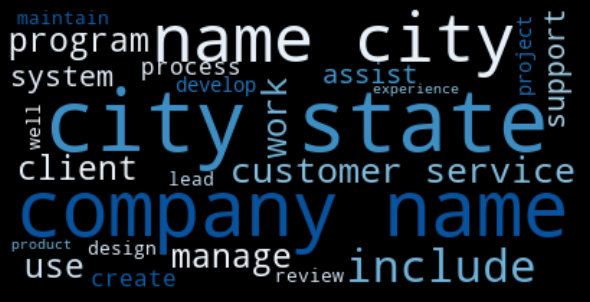

In [14]:
all_records = ''

# combining records into one string
for record in data['resume']:
    all_records += record
    
# creating wordcloud
wordcloud = WordCloud(background_color ='black',min_font_size = 10, colormap='Blues').generate(all_records)
   
# plotting wordcloud 
plt.figure(figsize = (8, 8), facecolor = 'black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [15]:
all_tokens = word_tokenize(all_records) # tokenize word in list
word_freq = nltk.FreqDist(all_tokens)
mostcommon = word_freq.most_common(50)
print(mostcommon)


[('state', 16255), ('company', 15713), ('city', 15100), ('management', 12110), ('name', 11776), ('customer', 11301), ('service', 9102), ('work', 8688), ('sale', 8362), ('skill', 8059), ('business', 7990), ('project', 7928), ('system', 7212), ('team', 7135), ('manage', 6578), ('client', 6504), ('new', 6420), ('experience', 6232), ('include', 6122), ('process', 6071), ('maintain', 5964), ('develop', 5951), ('development', 5797), ('provide', 5652), ('manager', 5525), ('training', 5189), ('report', 5154), ('design', 5099), ('account', 5074), ('support', 5058), ('program', 5027), ('product', 4846), ('plan', 4516), ('information', 4439), ('use', 4438), ('office', 4412), ('employee', 4384), ('financial', 4327), ('marketing', 4302), ('staff', 4223), ('professional', 4177), ('education', 4095), ('create', 3948), ('ensure', 3928), ('need', 3703), ('operation', 3689), ('year', 3686), ('assist', 3667), ('communication', 3631), ('university', 3506)]


# feature extraction : BoW, TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = data/

tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range = (1, 2))
features = tfidf.fit_transform(texts)
 
pd.Dataframe(features.todense(), columns = tfidf.get_feature_names())

ValueError: Iterable over raw text documents expected, string object received.